In [136]:
import pandas as pd
import xlrd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

In [128]:
oecd_data = pd.read_csv("OECD.csv")

In [147]:
imf_data = pd.read_csv('WEO_Data.csv', encoding = 'latin1', na_values = "n/a")

In [149]:
temp = imf_data[imf_data["Country"] == 'Cyprus']
temp

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
42,Cyprus,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",22587.49,2014.0


In [130]:
imf_data.dtypes

Country                           object
Subject Descriptor                object
Units                             object
Scale                             object
Country/Series-specific Notes     object
2015                             float64
Estimates Start After            float64
dtype: object

In [96]:
oecd_data.dtypes

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object

In [81]:
oecd_data.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [146]:
imf_data.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.99,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.38,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.14,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.32,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.30,2011.0


In [54]:
oecd_data1 = oecd_data[oecd_data["INEQUALITY"] == 'TOT']
oecd_bli = oecd_data1.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [131]:
def prepare_country_data(oecd_data, imf_data):
    oecd_data = oecd_data[oecd_data["INEQUALITY"] == 'TOT']
    oecd_data = oecd_data.pivot(index = "Country", columns = "Indicator", values = "Value")
    imf_data.rename(columns = {"2015": "GDP per Capita"}, inplace = True)
    imf_data.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left = oecd_data, right = imf_data, left_index = True, right_index = True)
    full_country_stats.sort_values(by = 'GDP per Capita', inplace = True)
    remove_indexes = [0,1,6,8,33,34,35]
    keep_indexes = list(set(range(36)) - set(remove_indexes))
    return full_country_stats[["GDP per Capita", "Life satisfaction"]].iloc[keep_indexes]

In [132]:
country_stats = prepare_country_data(oecd_data, imf_data)
x = np.c_[country_stats["GDP per Capita"]]
y = np.c_[country_stats["Life satisfaction"]]

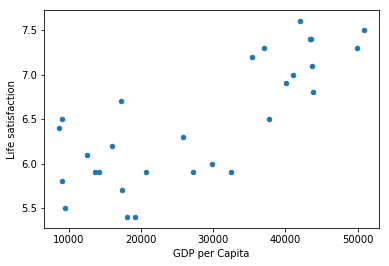

In [135]:
country_stats.plot(kind = 'scatter', x = "GDP per Capita", y = 'Life satisfaction')
plt.show()

In [137]:
model = sklearn.linear_model.LinearRegression()

In [151]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
x_new = [[22587]]
print(model.predict(x_new))

[[6.25984414]]


In [155]:
import sklearn.neighbors

In [170]:
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

In [171]:
model1.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [172]:
x_new1 = [[22587]]
print(model1.predict(x_new1))

[[5.86666667]]
